In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
# Import the dataset
data = pd.read_csv('Customer-Churn.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#	Get information about dataset (mean, max, min, quartiles etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Manipulation

In [3]:
#a.	Extract the 5th column & store it in ‘customer_5’
customer_5= data.iloc[:,[4]]

In [4]:
#b.	Extract the 15th column & store it in ‘customer_15’

customer_15 = data.iloc[:,[15]]


In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#c.	Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

senior_male_electronic = data[(data.gender=='Male') & (data.SeniorCitizen==1) & (data.PaymentMethod=='Electronic check')]

In [7]:
#d.	Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

customer_total_tenure = data[(data.tenure>70) | (data.MonthlyCharges>100)]

In [8]:
#e.	Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes= data[(data.Contract=='Two year')&(data.PaymentMethod=='Mailed check')& (data.Churn=='Yes')]

In [9]:
#f.	Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’

customer_333=data.sample(333)

In [10]:
#g.	Get the count of different levels from the ‘Churn’ column

data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Data Visualization


In [11]:
"""
a.	Build a bar-plot for the ’InternetService’ column
i.	Set x-axis label to ‘Categories of Internet Service’
ii.	Set y-axis label to ‘Count of Categories’
iii.	Set the title of plot to be ‘Distribution of Internet Service’
iv.	Set the color of the bars to be ‘orange’
"""

'\na.\tBuild a bar-plot for the ’InternetService’ column\ni.\tSet x-axis label to ‘Categories of Internet Service’\nii.\tSet y-axis label to ‘Count of Categories’\niii.\tSet the title of plot to be ‘Distribution of Internet Service’\niv.\tSet the color of the bars to be ‘orange’\n'

Text(0.5, 1.0, 'Distribution of Internet Service')

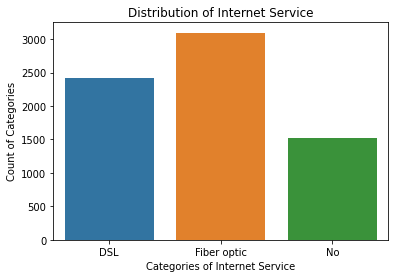

In [12]:
sb.countplot(data.InternetService)
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

In [13]:
"""
b.	Build a histogram for the ‘tenure’ column:
i.	Set the number of bins to be 30
ii.	Set the color of the bins  to be ‘green’
iii.	Assign the title ‘Distribution of tenure’
"""

'\nb.\tBuild a histogram for the ‘tenure’ column:\ni.\tSet the number of bins to be 30\nii.\tSet the color of the bins  to be ‘green’\niii.\tAssign the title ‘Distribution of tenure’\n'

Text(0.5, 1.0, 'Distribution of tenure')

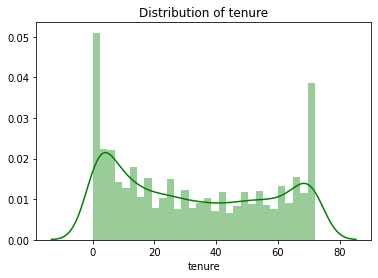

In [14]:
sb.distplot(data.tenure,bins=30,color='green')
plt.title('Distribution of tenure')

In [15]:
"""
c.	Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
i.	Assign the points a color of ‘brown’
ii.	Set the x-axis label to ‘Tenure of customer’
iii.	Set the y-axis label to ‘Monthly Charges of customer’
iv.	Set the title to ‘Tenure vs Monthly Charges’

"""

'\nc.\tBuild a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:\ni.\tAssign the points a color of ‘brown’\nii.\tSet the x-axis label to ‘Tenure of customer’\niii.\tSet the y-axis label to ‘Monthly Charges of customer’\niv.\tSet the title to ‘Tenure vs Monthly Charges’\n\n'

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

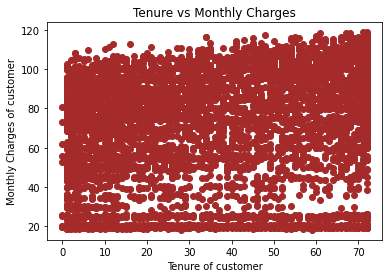

In [16]:
color='brown'
plt.scatter(x='tenure',y='MonthlyCharges',data=data,c=color)
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')  

In [17]:
"""
d.	Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. 
"""

'\nd.\tBuild a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis. \n'

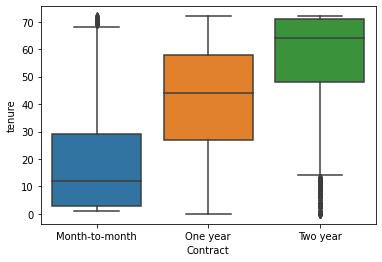

In [18]:
sb.boxplot(x='Contract',y='tenure',data=data)

In [19]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [20]:
for i in data.columns:
    if data[i].dtype=="object":
        label.fit(list(data[i].values))
        data[i]=label.transform(list(data[i].values))

In [21]:
y = data.Churn
X = data.drop(['Churn'],axis=1)

In [22]:
"""
C)	Linear Regression:
a.	Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
i.	Divide the dataset into train and test sets in 70:30 ratio. 
ii.	Build the model on train set and predict the values on test set
iii.	After predicting the values, find the root mean square error
iv.	Find out the error in prediction & store the result in ‘error’
v.	Find the root mean square error

"""

'\nC)\tLinear Regression:\na.\tBuild a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’\ni.\tDivide the dataset into train and test sets in 70:30 ratio. \nii.\tBuild the model on train set and predict the values on test set\niii.\tAfter predicting the values, find the root mean square error\niv.\tFind out the error in prediction & store the result in ‘error’\nv.\tFind the root mean square error\n\n'

In [23]:
#i.	Divide the dataset in 70:30 ratio

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [25]:
#ii.	Build the model on train set and predict the values on test set
linear_model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
linear_pred= linear_model.predict(xtest)

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
mse=mean_squared_error(ytest,linear_pred)
linear_rmse=np.sqrt(mse)

In [29]:
# Root mean square error
error = np.sqrt(mse)

In [30]:
print('Root Mean Square Error is',np.sqrt(mse))

Root Mean Square Error is 0.3748329203098463


Error for the prediction is applying Regression for Classification Problem

In [31]:
"""
D)	Logistic Regression:
a.	Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’
i.	Divide the dataset in 65:35 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and get the accuracy score


"""

'\nD)\tLogistic Regression:\na.\tBuild a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’\ni.\tDivide the dataset in 65:35 ratio\nii.\tBuild the model on train set and predict the values on test set\niii.\tBuild the confusion matrix and get the accuracy score\n\n\n'

In [32]:
X = data['MonthlyCharges']
y = data['Churn']

In [33]:
X = np.array(X)
X = X.reshape(-1,1)

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.35,random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [36]:
logistic.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
log_pred= logistic.predict(xtest)

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(ytest,log_pred))
print(confusion_matrix(ytest,log_pred))

0.7287104622871047
[[1797    0]
 [ 669    0]]


In [39]:
"""
b.	Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’
i.	Divide the dataset in 80:20 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and get the accuracy score

"""

'\nb.\tBuild a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’\ni.\tDivide the dataset in 80:20 ratio\nii.\tBuild the model on train set and predict the values on test set\niii.\tBuild the confusion matrix and get the accuracy score\n\n'

In [40]:
X = data[['MonthlyCharges','tenure']]
y = data.Churn

In [41]:

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
logistic.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
log_pred= logistic.predict(xtest)

In [44]:
print(accuracy_score(ytest,log_pred))
print(confusion_matrix(ytest,log_pred))

0.7977288857345636
[[944  92]
 [193 180]]


In [45]:
"""
  E)	Decision Tree:
a.	Build a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’
i.	Divide the dataset in 80:20 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and calculate the accuracy

"""

'\n  E)\tDecision Tree:\na.\tBuild a decision tree model where dependent variable is ‘Churn’ & independent variable is ‘tenure’\ni.\tDivide the dataset in 80:20 ratio\nii.\tBuild the model on train set and predict the values on test set\niii.\tBuild the confusion matrix and calculate the accuracy\n\n'

In [46]:
X = data['tenure']
y = data['Churn']

In [47]:
X = np.array(X)
X = X.reshape(-1,1)

In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()

In [50]:
decision.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
dec_pred= decision.predict(xtest)

In [52]:
print(accuracy_score(ytest,dec_pred))
print(confusion_matrix(ytest,dec_pred))

0.7572746628814763
[[951  85]
 [257 116]]


In [53]:
"""
Random Forest
a.	Build a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’
i.	Divide the dataset in 70:30 ratio
ii.	Build the model on train set and predict the values on test set
iii.	Build the confusion matrix and calculate the accuracy

"""

'\nRandom Forest\na.\tBuild a Random Forest model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ and ‘MonthlyCharges’\ni.\tDivide the dataset in 70:30 ratio\nii.\tBuild the model on train set and predict the values on test set\niii.\tBuild the confusion matrix and calculate the accuracy\n\n'

In [54]:
X = data[['MonthlyCharges','tenure']]
y = data.Churn

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [57]:
random_forest.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
ran_pred= random_forest.predict(xtest)

In [59]:
print(accuracy_score(ytest,ran_pred))
print(confusion_matrix(ytest,ran_pred))

0.7557974443918599
[[1334  205]
 [ 311  263]]
